In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [2]:
Univ = pd.read_csv('Universities_Clustering.csv')

In [3]:
Univ.head(5)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(Univ.iloc[:,1:])

In [6]:
df_norm.head(5)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [7]:

from scipy.cluster.hierarchy import linkage 

import scipy.cluster.hierarchy as sch # for creating dendrogram 

type(df_norm)

pandas.core.frame.DataFrame

In [8]:
z = linkage(df_norm, method="complete",metric="euclidean")

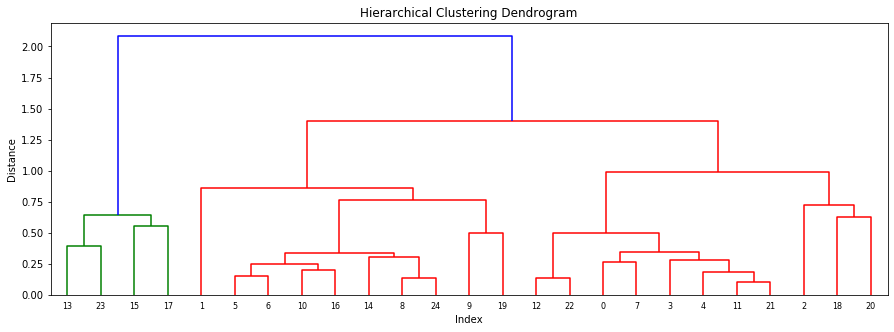

In [9]:
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [10]:
# Now applying AgglomerativeClustering choosing 3 as clusters from the dendrogram
from sklearn.cluster import	AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity = "euclidean").fit(df_norm) 


cluster_labels = pd.Series(h_complete.labels_)
Univ['clust'] = cluster_labels # creating a  new column and assigning it to new column 
Univ = Univ.iloc[:,[7,0,1,2,3,4,5,6]]
Univ.head()

,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,Brown,1310,89,22,13,22704,94
1,2,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,0,Cornell,1280,83,33,13,21864,90


In [11]:
Univ

,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,Brown,1310,89,22,13,22704,94
1,2,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,0,Cornell,1280,83,33,13,21864,90
5,2,Dartmouth,1340,89,23,10,32162,95
6,2,Duke,1315,90,30,12,31585,95
7,0,Georgetown,1255,74,24,12,20126,92
8,2,Harvard,1400,91,14,11,39525,97
9,2,JohnsHopkins,1305,75,44,7,58691,87


In [12]:
# getting aggregate mean of each cluster
Univ.iloc[:,2:].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364
1,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000


In [13]:
Univ[Univ['clust'] == 2]

,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
1,2,CalTech,1415,100,25,6,63575,81
5,2,Dartmouth,1340,89,23,10,32162,95
6,2,Duke,1315,90,30,12,31585,95
8,2,Harvard,1400,91,14,11,39525,97
9,2,JohnsHopkins,1305,75,44,7,58691,87
10,2,MIT,1380,94,30,10,34870,91
14,2,Princeton,1375,91,14,8,30220,95
16,2,Stanford,1360,90,20,12,36450,93
19,2,UChicago,1290,75,50,13,38380,87
24,2,Yale,1375,95,19,11,43514,96
